In [1]:
# Imports
import matplotlib.pyplot as plt
import maze_dataset as md
import maze_generator.maze_dataset as md
import numpy as np
import DQN.training as trainer
import DQN.agent as agent
import DQN.models as models
import os
print(os.getcwd())

/home/cody/Documents/DataSciBC/Generative_AI/maze_game


In [2]:
dataset = md.Maze_dataset(1,(3,3),maze_type = 'percolation')

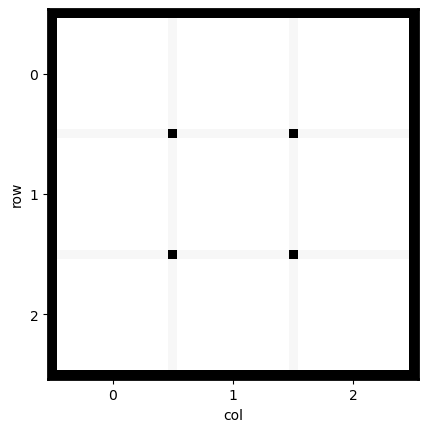

In [3]:
dataset.show_maze(0)

In [4]:
init_pos = {'agents': [0],
            'targets': [8]
                        }
# --- maze agent with the type of model --- #
maze_agent = agent.maze_agents(models.CNN_version1,
                               vision=3,
                               action_type='cardinal')
# --- trainer of the agent --- #
train = trainer.Maze_Training(name = 'test7',
                              maze_dataset = dataset,
                              maze_agent = maze_agent,
                              len_game=100,
                              n_agents=1,
                              gamma = 0.95,
                              tau = 0.01,
                              batch_size = 32,
                              n_frames = 100000,
                              lr = 0.00025,
                              replay_buffer_size=10000,
                              target_update=10000,
                              policy_update=8,
                              lambda_entropy=0.01,
                              beta = 0.9,
                              alpha = 0.4
                              )
train.train()
train.save()

frame 0 with loss 10.370355606079102


/home/cody/miniconda3/envs/GameRFL/lib/python3.12/site-packages/gymnasium/utils/passive_env_checker.py:245: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


frame 10000 with loss 15.415975570678711
frame 20000 with loss 18.658750534057617
frame 30000 with loss 15.193069458007812
frame 40000 with loss 18.01016616821289
frame 50000 with loss 12.581645965576172
frame 60000 with loss 12.729781150817871
frame 70000 with loss 15.668329238891602
frame 80000 with loss 9.19998836517334
frame 90000 with loss 9.102033615112305
frame 100000 with loss 7.867551803588867


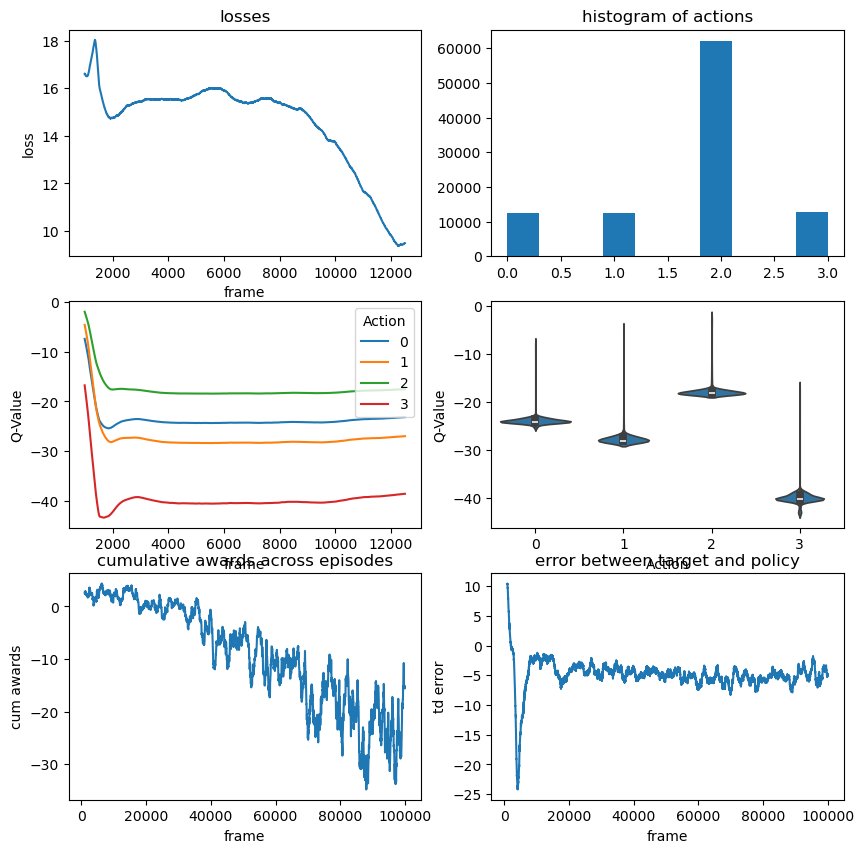

In [5]:
train.results()

In [12]:
init_pos = {'agents': [0],
            'targets': [8]
                        }
train.agents.run_agent(dataset.__getitem__(0),num_agents=1,len_game=50,epsilon=0,sample_prob=False, init_pos=None)


cumulative reward: [-4.23]


In [7]:
import DQN.agent as agent

load = agent.maze_agents.load('test6')

/home/cody/Documents/DataSciBC/Generative_AI/maze_game/DQN/agent.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  param_load = torch.load(os.path.join(fd, f'agent.pth'))

In [8]:
init_pos = {'agents': [0],
            'targets': [8]
                        }
testing_dataset = md.Maze_dataset(1,shape=(3,3),maze_type='percolation')

In [9]:
load.run_agent(testing_dataset[0],len_game=100,init_pos=init_pos)

cumulative reward: [3.64]
